In [1]:
import pandas as pd
import numpy as np

In [2]:
#import file from C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn
data = pd.read_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Titanic/train.csv", index_col=0)

In [3]:
# data['Age_Tenure_Ratio'] = data['Age']/data['Tenure']
# data['Balance_Salary_Ratio'] = data['Balance']/data['EstimatedSalary']
# data['Age_Balance_Ratio'] = data['Age']/data['Balance']
# data['Balance_Tenure_Ratio'] = data['Balance']/data['Tenure']
# data['CreditScore_Tenure_Ratio'] = data['CreditScore']/data['Tenure']
# data['OtherProducts'] = data['NumOfProducts'] - data['HasCrCard']
# data['Age_Balance_Salary_Ratio'] = data['Age']/data['Balance']/data['EstimatedSalary']
# data['Age_CreditScore_Ratio'] = data['Age']/data['CreditScore']
# data['Balance_CreditScore_Ratio'] = data['Balance']/data['CreditScore']
# data['Balance_Tenure_Salary_Ratio'] = data['Balance']/data['Tenure']/data['EstimatedSalary']
# data['CreditScore_Tenure_Salary_Ratio'] = data['CreditScore']/data['Tenure']/data['EstimatedSalary']
# data = data.replace([np.inf, -np.inf], 0)
# data = data.fillna(0)

In [4]:
%run Source_Be_With_Me.ipynb
eda(data)

Shape
Number of columns are 891 and number of rows are 11

Data types


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Sample rows - Top 5


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S




EDA Statistics


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33




Missing values


Age         177
Cabin       687
Embarked      2
dtype: int64



Count of Outliers


Fare      53
Parch    213
SibSp     12
dtype: int64

In [5]:
data['Cabin'] = data['Cabin'].str.extract('([A-Za-z])')

# Replace missing values in the new 'Cabin_Group' column
data['Cabin'].fillna('U', inplace=True)

deck_mapping = {
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'Others',
    'T': 'Others',  # There is only one entry with 'T', so grouping it as 'Unknown'
    'U': 'Others'  # 'U' represents missing values
}

data['Cabin'] = data['Cabin'].map(deck_mapping)

# Display the counts of each cabin group
print(data['Cabin'].value_counts())

Others    692
C          59
B          47
D          33
E          32
A          15
F          13
Name: Cabin, dtype: int64


In [6]:
data.drop(['Name', 'Ticket'], axis=1, inplace=True)
#replace missing values in age with mean
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Age'] = data['Age'].astype(int)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
eda(data)

Shape
Number of columns are 891 and number of rows are 9

Data types


Survived      int64
Pclass        int64
Sex          object
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

Sample rows - Top 5


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22,1,0,7.25,Others,S
2,1,1,female,38,1,0,71.28,C,C
3,1,3,female,26,0,0,7.92,Others,S
4,1,1,female,35,1,0,53.10,C,S
5,0,3,male,35,0,0,8.05,Others,S




EDA Statistics


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.54,0.52,0.38,32.20
std,0.49,0.84,13.01,1.10,0.81,49.69
min,0.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,22.00,0.00,0.00,7.91
50%,0.00,3.00,29.00,0.00,0.00,14.45
75%,1.00,3.00,35.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33




Missing values


Series([], dtype: int64)



Count of Outliers


Age        1
Fare      53
Parch    213
SibSp     12
dtype: int64

In [7]:
cabin_categories = data['Cabin'].unique()
for cabin_category in cabin_categories:
    column_name = 'Cabin_' + str(cabin_category)
    data[column_name] = 0  # Initialize with 0
    data.loc[data['Cabin'] == cabin_category, column_name] = 1  # Set to 1 where condition is met
data.drop('Cabin', axis=1, inplace=True)

Sex_categories = data['Sex'].unique()
for Sex_category in Sex_categories:
    column_name = 'Sex_' + str(Sex_category)
    data[column_name] = 0  # Initialize with 0
    data.loc[data['Sex'] == Sex_category, column_name] = 1  # Set to 1 where condition is met
data.drop('Sex', axis=1, inplace=True)

Embarked_categories = data['Embarked'].unique()
for Embarked_category in Embarked_categories:
    column_name = 'Embarked_' + str(Embarked_category)
    data[column_name] = 0  # Initialize with 0
    data.loc[data['Embarked'] == Embarked_category, column_name] = 1  # Set to 1 where condition is met
data.drop('Embarked', axis=1, inplace=True)

display(data.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_Others,Cabin_C,Cabin_E,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,22,1,0,7.25,1,0,0,0,0,0,0,1,0,1,0,0
2,1,1,38,1,0,71.28,0,1,0,0,0,0,0,0,1,0,1,0
3,1,3,26,0,0,7.92,1,0,0,0,0,0,0,0,1,1,0,0
4,1,1,35,1,0,53.10,0,1,0,0,0,0,0,0,1,1,0,0
5,0,3,35,0,0,8.05,1,0,0,0,0,0,0,1,0,1,0,0


In [8]:
trainX, trainY, testX, testY = stratified_sampling(data, 'Survived', 0.2, 903949505)

Original distribution


,counts,%
0,549,61.62
1,342,38.38




Train distribution


,counts,%
0,439,61.66
1,273,38.34




Test distribution


,counts,%
0,110,61.45
1,69,38.55




Train_x shape
Number of columns are 712 and number of rows are 17


,Pclass,Age,SibSp,Parch,Fare,Cabin_Others,Cabin_C,Cabin_E,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,
668,3,29,0,0,7.78,1,0,0,0,0,0,0,1,0,1,0,0
535,3,30,0,0,8.66,1,0,0,0,0,0,0,0,1,1,0,0
513,1,36,0,0,26.29,0,0,1,0,0,0,0,1,0,1,0,0
566,3,24,2,0,24.15,1,0,0,0,0,0,0,1,0,1,0,0
782,1,17,1,0,57.00,0,0,0,0,0,1,0,0,1,1,0,0




Train_y shape
Number of columns are 712 and number of rows are 1


,Survived
PassengerId,
668,0
535,0
513,1
566,0
782,1




Train_x shape
Number of columns are 179 and number of rows are 17


,Pclass,Age,SibSp,Parch,Fare,Cabin_Others,Cabin_C,Cabin_E,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,
54,2,29,1,0,26.00,1,0,0,0,0,0,0,0,1,1,0,0
235,2,24,0,0,10.50,1,0,0,0,0,0,0,1,0,1,0,0
823,1,38,0,0,0.00,1,0,0,0,0,0,0,1,0,1,0,0
188,1,45,0,0,26.55,1,0,0,0,0,0,0,1,0,1,0,0
152,1,22,1,0,66.60,0,1,0,0,0,0,0,0,1,1,0,0




Train_y shape
Number of columns are 179 and number of rows are 1


,Survived
PassengerId,
54,1
235,0
823,0
188,1
152,1


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainX)
trainX = pd.DataFrame(scaler.transform(trainX), columns=trainX.columns, index=trainX.index)
testX = pd.DataFrame(scaler.transform(testX), columns=testX.columns, index=testX.index)
display(trainX.head())
display(testX.head())

,Pclass,Age,SibSp,Parch,Fare,Cabin_Others,Cabin_C,Cabin_E,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,
668,1.0,0.36,0.00,0.0,0.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
535,1.0,0.38,0.00,0.0,0.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
513,0.0,0.45,0.00,0.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
566,1.0,0.30,0.25,0.0,0.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
782,0.0,0.21,0.12,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


,Pclass,Age,SibSp,Parch,Fare,Cabin_Others,Cabin_C,Cabin_E,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,
54,0.5,0.36,0.12,0.0,0.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
235,0.5,0.30,0.00,0.0,0.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
823,0.0,0.48,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
188,0.0,0.56,0.00,0.0,0.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
152,0.0,0.28,0.12,0.0,0.13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [10]:
# Dtree = decision_tree(X=trainX, Y=trainY, max_depth=9)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(Dtree, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(Dtree, testX, testY)

In [11]:
# XGB = xgboost(X=trainX, Y=trainY, learning_rate=0.05, n_estimators=1000, subsample=0.3, max_depth=5)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(XGB, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(XGB, testX, testY)

In [12]:
# KNN = knn(X=trainX, Y=trainY, distance='euclidean', n_neighbors=1000)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(KNN, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(KNN, testX, testY)

In [13]:
# NN = nnet(X=trainX, Y=trainY, learning_rate=0.001, loss='binary_crossentropy', epochs=100, batch_size=32, validation_split=0.2, patience=15)

In [14]:
# GBM = gradient_boosting(X=trainX, Y=trainY, learning_rate=0.01, n_estimators=10000, subsample=0.5, max_depth=6)
# print("Train performance")
# predictions_train, accuracy_train, f1_train = predict(GBM, trainX, trainY)
# print("Test performance")
# predictions_test, accuracy_test, f1_test = predict(GBM, testX, testY)

In [15]:
# #Testing on OOT dataset
# #read data C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\Test.csv
# submission = pd.read_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/Test.csv", index_col=0)
# # submission['Age_Tenure_Ratio'] = submission['Age']/submission['Tenure']
# # submission['Balance_Salary_Ratio'] = submission['Balance']/submission['EstimatedSalary']
# # submission['Age_Balance_Ratio'] = submission['Age']/submission['Balance']
# # submission['Balance_Tenure_Ratio'] = submission['Balance']/submission['Tenure']
# # submission['CreditScore_Tenure_Ratio'] = submission['CreditScore']/submission['Tenure']
# # submission['OtherProducts'] = submission['NumOfProducts'] - submission['HasCrCard']
# # submission['Age_Balance_Salary_Ratio'] = submission['Age']/submission['Balance']/submission['EstimatedSalary']
# # submission['Age_CreditScore_Ratio'] = submission['Age']/submission['CreditScore']
# # submission['Balance_CreditScore_Ratio'] = submission['Balance']/submission['CreditScore']
# # submission['Balance_Tenure_Salary_Ratio'] = submission['Balance']/submission['Tenure']/submission['EstimatedSalary']
# # submission['CreditScore_Tenure_Salary_Ratio'] = submission['CreditScore']/submission['Tenure']/submission['EstimatedSalary']
# submission = submission.replace([np.inf, -np.inf], 0)
# submission = submission.fillna(0)
# submission.drop(['Surname','CustomerId'], axis=1, inplace=True)
# submission['HasCrCard'] = submission['HasCrCard'].astype(int)
# submission['Age'] = submission['Age'].astype(int)
# submission['IsActiveMember'] = submission['IsActiveMember'].astype(int)
# # Transforming
# transformed = transformer.transform(submission)
# # Transformating back
# transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
# # One-hot encoding removed an index. Let's put it back:
# transformed_df.index = submission.index
# # Joining tables
# submission = pd.concat([submission, transformed_df], axis=1)
# # Dropping old categorical columns
# submission.drop(['Geography','Gender'], axis=1, inplace=True)
# # CHecking result
# eda(submission)
# submission = pd.DataFrame(scaler.transform(submission), columns=submission.columns, index=submission.index)

# # #Use Dtree
# # predictions_submission = Dtree.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_Dtree.csv", index=True)

# # #Use XGB
# # predictions_submission = XGB.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_XGB.csv", index=True)

# # #Use Knn
# # predictions_submission = KNN.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_KNN.csv", index=True)

# #Use NN
# predictions_submission = NN.predict(submission)
# threshold = 0.8
# predictions_submission = (predictions_submission > threshold).astype(int)
# predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# #change column names to submi
# predictions_submission.columns = ['Exited']
# display(predictions_submission.head())
# #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_NN8.csv", index=True)

# # #Use GBM
# # predictions_submission = GBM.predict(submission)
# # predictions_submission = pd.DataFrame(predictions_submission, index=submission.index)
# # #change column names to submi
# # predictions_submission.columns = ['Exited']
# # predictions_submission.head()
# # #export to C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Bank_churn\submi.csv with index
# # predictions_submission.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Bank_churn/submi_GBM.csv", index=True)

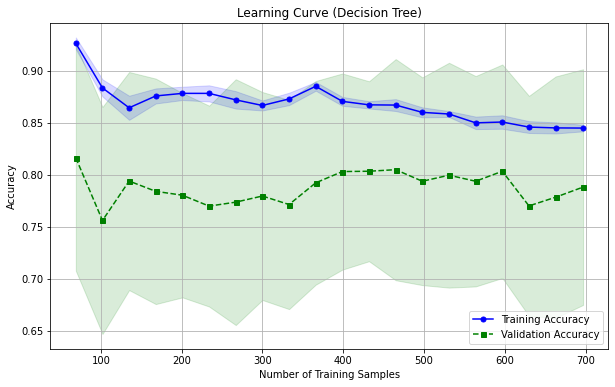

In [22]:
#learning curve DTree
learning_curve_decision_tree(trainX, trainY, train_sizes=np.linspace(0.1, 1, 20), cv=50, criterion= 'gini', max_depth=5, min_samples_leaf=1, min_samples_split=10)